In [10]:
#EX 1
import numpy as np
data = [10, 12, 14, 15, 18, 21, 22, 23, 50]  # 50 is an outlier
dataset_std = np.std(data)
outliers = [outlier for outlier in data if outlier > (2*dataset_std)]
outliers

[23, 50]

In [12]:
#EX 2
#Weighted mean = E(X)
grades = [90, 85, 80, 95]
weights = [0.3, 0.2, 0.2, 0.3]  # Sum of weights should be 1
print(sum([g*w for g, w in zip(grades, weights)]))

88.5


In [18]:
#EX 3
import numpy as np

marketing_spend = [1000, 2000, 3000, 4000, 5000, 6000]
sales = [5000, 7000, 9000, 11000, 13000, 15000]


total_pairs = 0
for _, _ in zip(marketing_spend, sales):
    total_pairs += 1

mean_mkt_spend = np.mean(marketing_spend)
mean_sales = np.mean(sales)

difference_mkt_elements_with_mean = [element - mean_mkt_spend for element in marketing_spend]
difference_sale_elements_with_mean = [e - mean_sales for e in sales]
product_between_difference = [d1 * d2 for d1, d2 in zip(difference_mkt_elements_with_mean, difference_sale_elements_with_mean)]
sum_of_products = sum(product_between_difference)
cov = sum_of_products/total_pairs
marketing_spend_std = np.std(marketing_spend)
sales_std = np.std(sales)
print(cov/(marketing_spend_std*sales_std))

#Chua biet cach su dung numpy vi no lai tra ra ma tran cac gia tri?

1.0


dataset is positively skewed
dataset is negatively skewed
dataset is negatively skewed


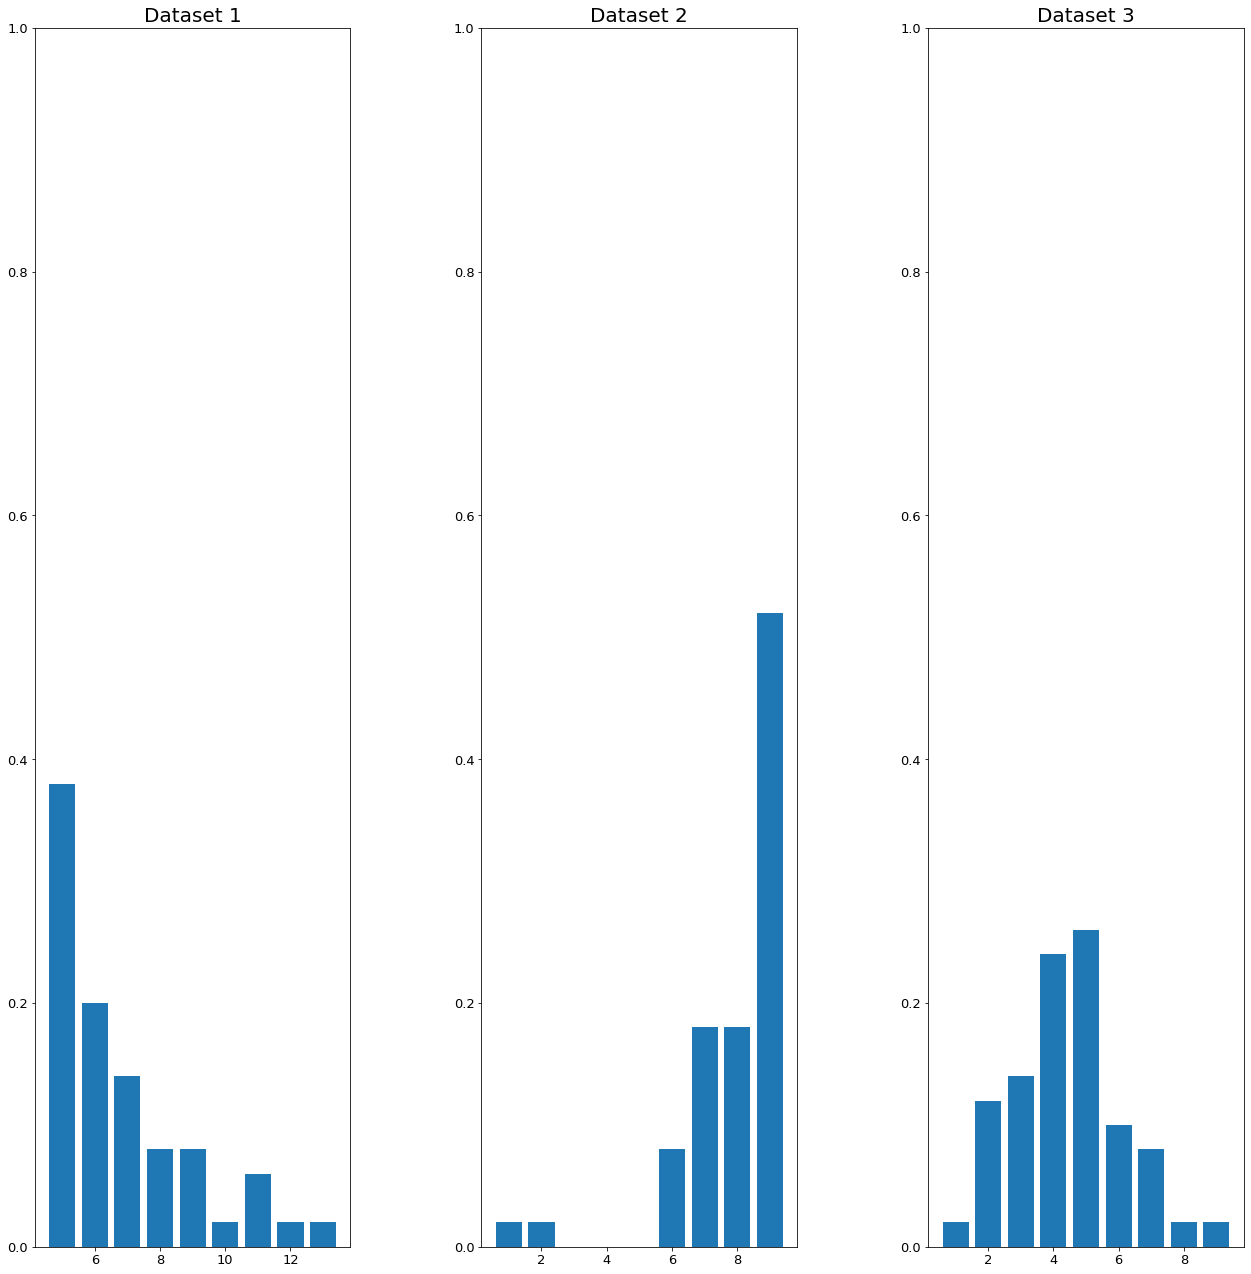

In [34]:
#EX 4
import numpy as np
import pandas as pd
from scipy import stats as st
from matplotlib import pyplot as plt
from collections import Counter

def skewed_or_normal(dataset) -> str:
    dset_mean = np.mean(dataset)
    dset_median = np.median(dataset)
    dset_mode_as_nparray = st.mode(dataset)
    dset_mode = dset_mode_as_nparray.mode[0][0]

    if(dset_mean > dset_median > dset_mode):
        return "dataset is positively skewed"
    elif(dset_mean == dset_median == dset_mode):
        return "dataset is normally distributed"
    else:
        return "dataset is negatively skewed" #approximation is impossible - case 1
    #What happen if 2 out of 3 coefficients are the same ? - case 2


dataset1 = pd.read_csv("three_skewed_datasets.csv", index_col=False , usecols=["dataset_1"])
numpy_dset_1 = dataset1.to_numpy()
print(skewed_or_normal(numpy_dset_1))

dataset2 = pd.read_csv("three_skewed_datasets.csv", index_col=False , usecols=["dataset_2"])
numpy_dset_2= dataset2.to_numpy()
print(skewed_or_normal(numpy_dset_2))

dataset3 = pd.read_csv("three_skewed_datasets.csv", index_col=False , usecols=["dataset_3"])
numpy_dset_3= dataset3.to_numpy()
print(skewed_or_normal(numpy_dset_3))

fig, _ = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 20))
fig.tight_layout(pad=10.0)

plt.subplot(1,3,1)
dataset_1_as_list = [sublist[0] for sublist in numpy_dset_1.tolist()]
counter_1 = Counter(dataset_1_as_list)
keys_1 = list(counter_1.keys())
values_1 = list(counter_1.values())
plt.bar(keys_1, [count/len(numpy_dset_1) for count in values_1])
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.title("Dataset 1", size=20)
plt.ylim(0,1)

plt.subplot(1,3,2)
dataset_2_as_list = [sublist[0] for sublist in numpy_dset_2.tolist()]
counter_2 = Counter(dataset_2_as_list)
keys_2 = list(counter_2.keys())
values_2 = list(counter_2.values())
plt.bar(keys_2, [count/len(numpy_dset_2) for count in values_2])
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.title("Dataset 2", size=20)
plt.ylim(0,1)

plt.subplot(1,3,3)
dataset_3_as_list = [sublist[0] for sublist in numpy_dset_3.tolist()]
counter_3 = Counter(dataset_3_as_list)
keys_3 = list(counter_3.keys())
values_3 = list(counter_3.values())
plt.bar(keys_3, [count/len(numpy_dset_3) for count in values_3])
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.title("Dataset 3", size=20)
plt.ylim(0,1)

plt.show()